# Multivariate Linear Regression

In this assignment, you will implement multivariate linear regression to predict the price of houses based on its characteristics.

Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices. The file houses.csv contains a training set of housing prices in the city of Valladolid. The first column is the size of the house (in square feet), the second column is the number of bedrooms and the third column is the price of the house. Dataset is like below:

| Size of the house (in square feet) | Number of bedrooms | Price of the house |
|------------------------------------|--------------------|--------------------|
| 2104                               | 3                  | 399900             |
| 1600                               | 3                  | 329900             |
| 2400                               | 3                  | 369000             |


You should fit a multivariate linear regression model using size and bedrooms as variables to predict the price:
* Plot scatterplot of the two variables against price
* Use Scikit-learn to fit the model
* Compute the parameters with the normal equations using np.linalg.inv()
* Compute the parameters with the pseudo-inverse using np.linalg.pinv()
* Plot the fitted surface obtained with any of the previous methods

After that, you should implement the gradient descent algorithm to train a multivariate linear regression model. Try to fit the model with gradient descent and describe the results.

Note that you should standardize the values of the input variables, substracting the mean and dividing by the standard deviation.

For gradient descent you should consider the following:

* Define a variable for the learning rate $\alpha$ and try with a default value of 0.01.
* Define a maximum number of iterations with 5000 as default.
* Initialize $\boldsymbol{\theta}$ with random values or zeros.
* Plot J as a function of time (iterations).

Finally you should implement stochastic and mini-batch gradient descent and compare results.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

### Plot data

In [ ]:
# Your code
houses = pd.read_csv("houses.csv", names=["size", "rooms", "price"])
houses.head()

,size,rooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [ ]:
X_data = np.array(houses[['size', 'rooms']])
y_data = np.array(houses['price']).reshape(-1, 1)
X_data.shape, y_data.shape
#the reshaping of the arrays is 

((47, 2), (47, 1))

In [ ]:
X_data

array([[2104,    3],
       [1600,    3],
       [2400,    3],
       [1416,    2],
       [3000,    4],
       [1985,    4],
       [1534,    3],
       [1427,    3],
       [1380,    3],
       [1494,    3],
       [1940,    4],
       [2000,    3],
       [1890,    3],
       [4478,    5],
       [1268,    3],
       [2300,    4],
       [1320,    2],
       [1236,    3],
       [2609,    4],
       [3031,    4],
       [1767,    3],
       [1888,    2],
       [1604,    3],
       [1962,    4],
       [3890,    3],
       [1100,    3],
       [1458,    3],
       [2526,    3],
       [2200,    3],
       [2637,    3],
       [1839,    2],
       [1000,    1],
       [2040,    4],
       [3137,    3],
       [1811,    4],
       [1437,    3],
       [1239,    3],
       [2132,    4],
       [4215,    4],
       [2162,    4],
       [1664,    2],
       [2238,    3],
       [2567,    4],
       [1200,    3],
       [ 852,    2],
       [1852,    4],
       [1203,    3]], dtype=int64)

### Standardize data

Note that this is not necessary for sklearn, normal equations and SVD, but done here just to compare results with gradient descent methods where standarization is recommended.

In [ ]:
# Standardize original X variables
# X_data = StandardScaler().fit_transform(X_data)
# X_data

In [ ]:
# X_data[:,1].mean(), X_data[:,1].std()

In [ ]:
# Alternative way to do it step by step (useful if you want to make inference later)
scaler = StandardScaler()
scaler.fit(X_data)
X_data = scaler.transform(X_data)
X_data

array([[ 1.31415422e-01, -2.26093368e-01],
       [-5.09640698e-01, -2.26093368e-01],
       [ 5.07908699e-01, -2.26093368e-01],
       [-7.43677059e-01, -1.55439190e+00],
       [ 1.27107075e+00,  1.10220517e+00],
       [-1.99450507e-02,  1.10220517e+00],
       [-5.93588523e-01, -2.26093368e-01],
       [-7.29685755e-01, -2.26093368e-01],
       [-7.89466782e-01, -2.26093368e-01],
       [-6.44465993e-01, -2.26093368e-01],
       [-7.71822042e-02,  1.10220517e+00],
       [-8.65999486e-04, -2.26093368e-01],
       [-1.40779041e-01, -2.26093368e-01],
       [ 3.15099326e+00,  2.43050370e+00],
       [-9.31923697e-01, -2.26093368e-01],
       [ 3.80715024e-01,  1.10220517e+00],
       [-8.65782986e-01, -1.55439190e+00],
       [-9.72625673e-01, -2.26093368e-01],
       [ 7.73743478e-01,  1.10220517e+00],
       [ 1.31050078e+00,  1.10220517e+00],
       [-2.97227261e-01, -2.26093368e-01],
       [-1.43322915e-01, -1.55439190e+00],
       [-5.04552951e-01, -2.26093368e-01],
       [-4.

In [ ]:
# Include vector of ones at the beginning
X = np.c_[np.ones(X_data.shape[0]), X_data]
X

array([[ 1.00000000e+00,  1.31415422e-01, -2.26093368e-01],
       [ 1.00000000e+00, -5.09640698e-01, -2.26093368e-01],
       [ 1.00000000e+00,  5.07908699e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.43677059e-01, -1.55439190e+00],
       [ 1.00000000e+00,  1.27107075e+00,  1.10220517e+00],
       [ 1.00000000e+00, -1.99450507e-02,  1.10220517e+00],
       [ 1.00000000e+00, -5.93588523e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.29685755e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.89466782e-01, -2.26093368e-01],
       [ 1.00000000e+00, -6.44465993e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.71822042e-02,  1.10220517e+00],
       [ 1.00000000e+00, -8.65999486e-04, -2.26093368e-01],
       [ 1.00000000e+00, -1.40779041e-01, -2.26093368e-01],
       [ 1.00000000e+00,  3.15099326e+00,  2.43050370e+00],
       [ 1.00000000e+00, -9.31923697e-01, -2.26093368e-01],
       [ 1.00000000e+00,  3.80715024e-01,  1.10220517e+00],
       [ 1.00000000e+00, -8.65782986e-01

In [ ]:
# Convert to thousand dollar for convenience
y = y_data / 1000
y

array([[399.9  ],
       [329.9  ],
       [369.   ],
       [232.   ],
       [539.9  ],
       [299.9  ],
       [314.9  ],
       [198.999],
       [212.   ],
       [242.5  ],
       [239.999],
       [347.   ],
       [329.999],
       [699.9  ],
       [259.9  ],
       [449.9  ],
       [299.9  ],
       [199.9  ],
       [499.998],
       [599.   ],
       [252.9  ],
       [255.   ],
       [242.9  ],
       [259.9  ],
       [573.9  ],
       [249.9  ],
       [464.5  ],
       [469.   ],
       [475.   ],
       [299.9  ],
       [349.9  ],
       [169.9  ],
       [314.9  ],
       [579.9  ],
       [285.9  ],
       [249.9  ],
       [229.9  ],
       [345.   ],
       [549.   ],
       [287.   ],
       [368.5  ],
       [329.9  ],
       [314.   ],
       [299.   ],
       [179.9  ],
       [299.9  ],
       [239.5  ]])

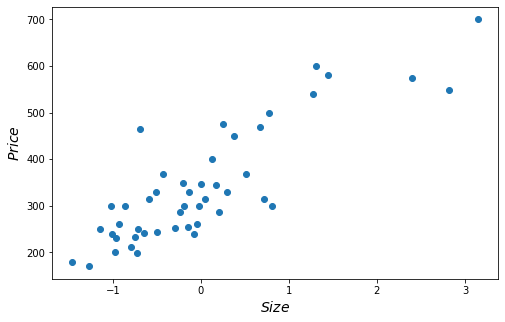

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(X[:,1], y)
plt.xlabel("$Size$", fontsize=14)
plt.ylabel("$Price$", fontsize=14)
plt.show()

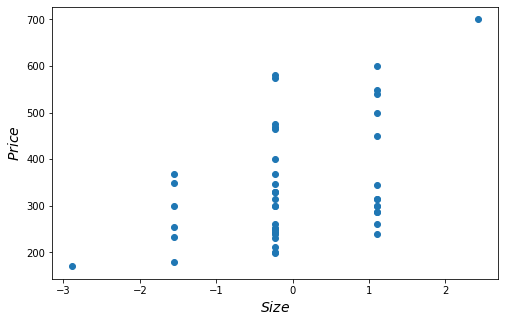

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(X[:,2], y)
plt.xlabel("$Size$", fontsize=14)
plt.ylabel("$Price$", fontsize=14)
plt.show()

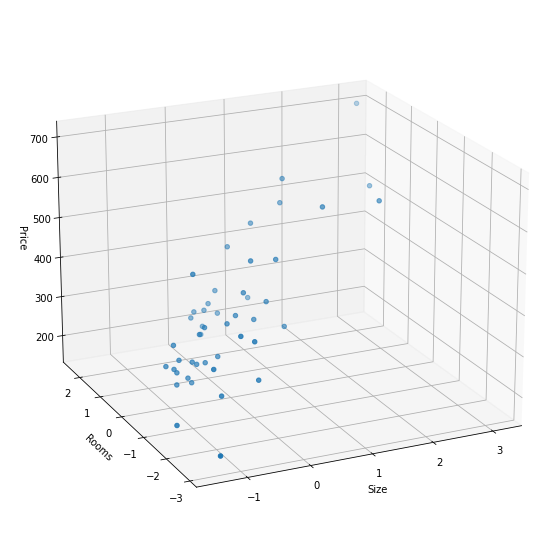

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,1], X[:,2], y)
ax.set_xlabel('Size')
ax.set_ylabel('Rooms')
ax.set_zlabel('Price')
ax.view_init(20, 245)
plt.show()

### Scikit-learn

In [ ]:
# Your code
lr = LinearRegression(fit_intercept=False)
lr.fit(X, y)
print(lr.coef_)

[[340.41265957 109.44779647  -6.57835485]]


$\hat{y} = 340.4127 + 109.4478 x_1 - 6.5784 x_2$

#### Make inference with one example

In [ ]:
size, rooms = 1600, 3
new_house = np.array([size, rooms]).reshape(1,2)
new_house

array([[1600,    3]])

In [ ]:
# Without scaling
non_scaled_x = np.c_[[1], new_house]
non_scaled_x

array([[   1, 1600,    3]])

In [ ]:
lr.predict(non_scaled_x)

array([[175437.15194644]])

Using the data without scaling give us a very big value in the order of millions (remember in this exercise the *y* values are scaled down to thousand of dollars), so unless we are talking about Buckingham Palace the predicted price doesn't seem right.

In [ ]:
# Scaling the data
scaled_x = scaler.transform(new_house)
scaled_x

array([[-0.5096407 , -0.22609337]])

In [ ]:
scaled_x = np.c_[[1], scaled_x]
scaled_x

array([[ 1.        , -0.5096407 , -0.22609337]])

In [ ]:
lr.predict(scaled_x)

array([[286.12093063]])

Now the predicted price in thousands of dollars makes more sense.

### Plot fitted model along with data points

In [ ]:
theta_hat = lr.coef_.T
theta_hat

array([[340.41265957],
       [109.44779647],
       [ -6.57835485]])

In [ ]:
size_points, rooms_points = np.meshgrid([np.min(X[:,1]), np.max(X[:,1])],[np.min(X[:,2]), np.max(X[:,2])])
size_points, rooms_points

(array([[-1.46104938,  3.15099326],
        [-1.46104938,  3.15099326]]),
 array([[-2.88269044, -2.88269044],
        [ 2.4305037 ,  2.4305037 ]]))

In [ ]:
price_points = theta_hat[0] + theta_hat[1] * size_points + theta_hat[2] * rooms_points

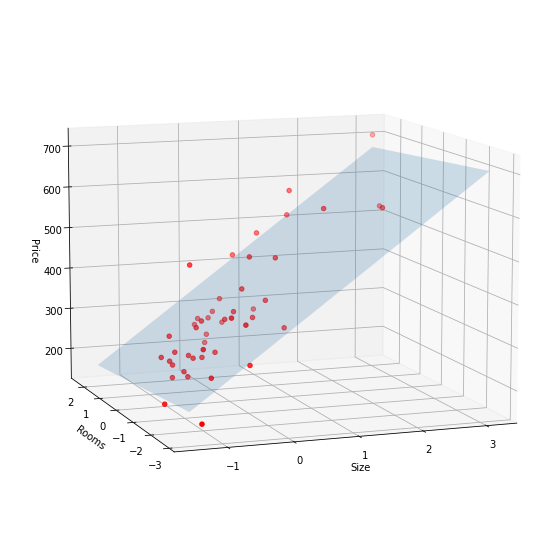

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,1], X[:,2], y, c='r')
ax.set_xlabel('Size')
ax.set_ylabel('Rooms')
ax.set_zlabel('Price')
ax.plot_surface(size_points, rooms_points, price_points, alpha=0.2)
ax.view_init(10, 250)
#plt.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

fig_layout = go.Layout(title='Fitted model', autosize=True, width=800, height=800,
                       scene = dict(xaxis=dict(title='Size'),
                                    yaxis=dict(title='Rooms'),
                                    zaxis=dict(title='Price')))

fig = px.scatter_3d(x=X[:,1].ravel(), y=X[:,2].ravel(), z=y.ravel())
fig.update_traces(marker=dict(size=3))
fig.update_layout(fig_layout)
fig.add_traces(go.Surface(x=size_points, y=rooms_points, z=price_points, opacity=0.2))

fig.show()

In [ ]:
X

array([[ 1.00000000e+00,  1.31415422e-01, -2.26093368e-01],
       [ 1.00000000e+00, -5.09640698e-01, -2.26093368e-01],
       [ 1.00000000e+00,  5.07908699e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.43677059e-01, -1.55439190e+00],
       [ 1.00000000e+00,  1.27107075e+00,  1.10220517e+00],
       [ 1.00000000e+00, -1.99450507e-02,  1.10220517e+00],
       [ 1.00000000e+00, -5.93588523e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.29685755e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.89466782e-01, -2.26093368e-01],
       [ 1.00000000e+00, -6.44465993e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.71822042e-02,  1.10220517e+00],
       [ 1.00000000e+00, -8.65999486e-04, -2.26093368e-01],
       [ 1.00000000e+00, -1.40779041e-01, -2.26093368e-01],
       [ 1.00000000e+00,  3.15099326e+00,  2.43050370e+00],
       [ 1.00000000e+00, -9.31923697e-01, -2.26093368e-01],
       [ 1.00000000e+00,  3.80715024e-01,  1.10220517e+00],
       [ 1.00000000e+00, -8.65782986e-01

In [ ]:
y_true=y
y_true

array([[399.9  ],
       [329.9  ],
       [369.   ],
       [232.   ],
       [539.9  ],
       [299.9  ],
       [314.9  ],
       [198.999],
       [212.   ],
       [242.5  ],
       [239.999],
       [347.   ],
       [329.999],
       [699.9  ],
       [259.9  ],
       [449.9  ],
       [299.9  ],
       [199.9  ],
       [499.998],
       [599.   ],
       [252.9  ],
       [255.   ],
       [242.9  ],
       [259.9  ],
       [573.9  ],
       [249.9  ],
       [464.5  ],
       [469.   ],
       [475.   ],
       [299.9  ],
       [349.9  ],
       [169.9  ],
       [314.9  ],
       [579.9  ],
       [285.9  ],
       [249.9  ],
       [229.9  ],
       [345.   ],
       [549.   ],
       [287.   ],
       [368.5  ],
       [329.9  ],
       [314.   ],
       [299.   ],
       [179.9  ],
       [299.9  ],
       [239.5  ]])

In [ ]:
theta_hat

array([[340.41265957],
       [109.44779647],
       [ -6.57835485]])

In [ ]:
#Calculation of y predicted by means of a matrix product
import numpy as np
y_predic=np.matmul(X,theta_hat)
y_predic

array([[356.28311034],
       [286.12093063],
       [397.48946985],
       [269.24418573],
       [472.27785515],
       [330.97902102],
       [276.93302615],
       [262.03748403],
       [255.49458235],
       [271.36459919],
       [324.71454069],
       [341.80520024],
       [326.4920261 ],
       [669.29321223],
       [239.90298686],
       [374.83038333],
       [255.87996102],
       [235.44824529],
       [417.84648161],
       [476.59338604],
       [309.36911319],
       [334.95162386],
       [286.67777333],
       [327.77717552],
       [604.91337413],
       [216.51559363],
       [266.35301492],
       [415.03001477],
       [369.64733504],
       [430.48239959],
       [328.13030084],
       [220.07056445],
       [338.63560809],
       [500.0877366 ],
       [306.75636374],
       [263.42959077],
       [235.86587731],
       [351.4429901 ],
       [641.41882408],
       [355.61931032],
       [303.76843288],
       [374.93734066],
       [411.9996333 ],
       [230

## THEORY OF THE METRICS
Metrics in machine learning are used to measure the performance of a model on a given task. They provide a way to quantitatively evaluate how well a model is performing and can be used to compare different models or to optimize model hyperparameters.

### Median Absolute Error

The Median Absolute Error (MedAE) is a measure of the median of the absolute differences between the predicted and true values of the target variable. It is calculated by taking the absolute difference between each predicted value and true value, then computing the median of these absolute differences.Finally, the median absolute error is particularly interesting because it is robust to outliers, so it is a good complement to other metrics which are sensible to them like Maximum Error.

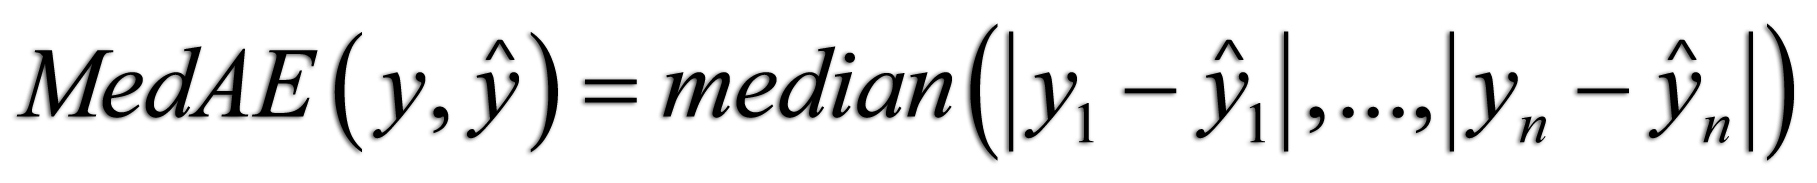

In [ ]:
#Calculation of median error with the scikit learn function
from sklearn.metrics import median_absolute_error
median_absolute_error(y_true,y_predic,multioutput='uniform_average')

43.77777333008518

In [ ]:
#Calculation of median error with a numpy
r=abs(y_predic-y_true)
p=np.median(r)
p

43.77777333008518

Comparison: 
The first code snippet uses the median_absolute_error() function from scikit-learn's metrics module to compute the median absolute error. This function takes two arguments: y_true, which is a NumPy array of the true target values, and y_pred, which is a NumPy array of the predicted target values. The function returns a single value, which is the median absolute error between the two sets of values.

The second code snippet computes the absolute difference between the predicted and true values using NumPy's abs() function, then calculates the median of these absolute differences using NumPy's median() function. This approach requires two additional lines of code to compute the error and assign it to a variable.

## Maximum Error

Maximum Error is a metric used in machine learning to measure the largest deviation between the predicted values and the actual values. It is also known as the maximum residual or the maximum absolute error.

Mathematically, maximum error is defined as the maximum absolute difference between the predicted value and the actual value in the dataset.

For example, let's say we have a set of actual values {2, 5, 7, 10} and their corresponding predicted values {1, 6, 6, 9}. For example, the maximum error in this case would be the absolute difference between the actual value 7 and the predicted value 6, which is 1.

It is also important to know that this metric is sensible to outliers, so it is recommended to be used with other metrics.

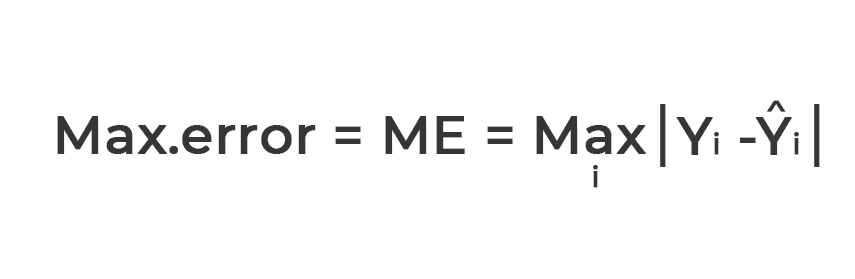

In [ ]:
from sklearn.metrics import max_error

In [ ]:
#Calculation of max error with the scikit learn function

max_error(y_true,y_predic)

198.14698507648814

In [ ]:
#manual de max value
m=np.max(r)
m

198.14698507648814

Comparison: The first code uses the scikit-learn library's max_error function to calculate the maximum error between the predicted and true values. It takes in y_true and y_pred, and returns the ME.

On the other hand, the second code calculates the absolute difference between the predicted and true values using the abs function and stores them in a variable r from the median_absolute_error procedure. Finally, it uses the numpy library's max function to calculate the maximum value in the r array, which represents the maximum error.

In terms of efficiency, the first code might be faster because it uses an optimized function from scikit. However, it may not be as flexible if we want to customize the way the maximum error is calculated, as it relies on the scikit-learn implementation.

The second code is more flexible, as it allows us to customize the calculation of the maximum error by modifying the r array. It also uses basic numpy functions, which can be helpful if we are already working with numpy arrays.

Overall, both codes provide the same result, but the choice between them depends on the specific requirements of the problem.





### Bibliography 

[1]C. Pascual, “Tutorial: Understanding Linear Regression and Regression Error Metrics,” Dataquest, Jun. 10, 2019. https://www.dataquest.io/blog/understanding-regression-error-metrics/

[2]scikit-learn developers, “sklearn.metrics.max_error,” scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.max_error.html

[3]scikit-learn developers, “sklearn.metrics.median_absolute_error,” scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.median_absolute_error.html

[4]R. Bonnin, “Median absolute error - Machine Learning for Developers [Book],” www.oreilly.com, Oct. 2017. https://www.oreilly.com/library/view/machine-learning-for/9781786469878/9f44e711-deb6-42de-abbd-524832ad32cc.xhtml (accessed Mar. 09, 2023).

[5]“Regression Algorithms: which Machine Learning Metrics?,” MyDataModels, Oct. 21, 2020. https://www.mydatamodels.com/learn/guide/a-path-to-discover-ai/regression-algorithms-which-machine-learning-metrics/